In [391]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split



# Loading datasets

In [392]:
X,y = load_breast_cancer(return_X_y=True)

#X = np.array([[1, 2],[3, 4],[5, 6],[7, 8],[9, 10],[97, 10],[9, 140]])

#y = np.array([0, 0, 1, 1, 0, 1,1])

#Il parametro return_X_y=True specifica che la funzione deve restituire sia le features (variabili indipendenti) che i target (variabile dipendente) separatamente.
#X: Contiene le features (variabili indipendenti) del dataset di Breast Cancer.
#y: Contiene i target (variabile dipendente) del dataset di Breast Cancer. Questi target rappresentano l'etichetta di classe associata a ogni campione 
# e indicano se il tumore è benigno (0) o maligno (1).

In [393]:
data = load_breast_cancer()
# Crea un dataframe pandas con le features e i target, per visualizzarlo meglio
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Stampa il dataframe
#print(df)

#TODO Split train/test, decidiamo noi la dimensione
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

#print(X)
#print(y)
#print(test_data)
#print(test_labels)
#print(train_data)
#print(train_labels)



# Fitting the data

In [394]:
lr = LogisticRegression(max_iter=10000)

In [395]:
lr.fit(train_data, train_labels)

LogisticRegression(max_iter=10000)

# Making predictions

In [396]:
scores = lr.predict_proba(test_data)[:,1]  #versione scoring del classificatore
#possiamo prendere le etichetta anche così
predicted = lr.predict(test_data)
print(predicted)
print(test_labels)
print(scores)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1]
[6.95120366e-03 9.67842170e-01 9.96803813e-01 7.84065781e-01
 9.99895292e-01 9.96119167e-01 9.89898432e-01 9.97805566e-01
 9.59795985e-01 9.99687378e-01 4.86968653e-01 8.39438587e-01
 9.94731743e-01 2.29556638e-01 7.22535743e-01 8.858

# Functions for evaluating fp,tp and accuracy

In [397]:
def eval_fp_tp(actual, predicted):
    assert len(actual) == len(predicted), "Le dimensioni degli array actual e predicted devono essere uguali"

    # Inizializza i contatori per FP e TP
    fp = 0
    tp = 0

    # Calcola il numero di falsi positivi e veri positivi
    for i in range(len(actual)):
        if actual[i] == 0 and predicted[i] == 1:
            fp += 1
        elif actual[i] == 1 and predicted[i] == 1:
            tp += 1

    return fp, tp

#TODO questa deve restituire una coppia di valori (TP,FP) date le etichette vere e le etichette predette

fp, tp = eval_fp_tp(test_labels, predicted)

# Stampa i valori di FP e TP
print("Falsi Positivi (FP):", fp)
print("Veri Positivi (TP):", tp)

Falsi Positivi (FP): 1
Veri Positivi (TP): 115


In [398]:
def eval_accuracy(actual, predicted):
    assert len(actual) == len(predicted), "Le dimensioni degli array actual e predicted devono essere uguali"

    # Calcola l'accuratezza
    correct = 0
    total = len(actual)
    for i in range(total):
        if actual[i] == predicted[i]:
            correct += 1

    accuracy = correct / total
    return accuracy

print("Accuracy:", eval_accuracy(test_labels,predicted))

Accuracy: 0.9627659574468085


# fp,tp and accuracy evaluations for different thresholds

Given the scores for the test cases, we might want to find the best possible threshold for classification, i.e., the real value $t$ such that `scores >` $t$ gives the best classifiation of the examples. 

Let us then start to consider 100 possible thresholds in the range $[0,1]$:

In [399]:
thresholds = np.arange(0, 1, 0.01)

print(thresholds)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


and compute the tp, fp, and accuracy values of the labelings obtained by comparing the scores with those thresholds.

In [400]:
performances = []
fps, tps = [], []
... #TODO creare un loop che popola i falsi positivi e i true positive, quindi nel primo elemento 
#di fps ci sarà il numero di falsi positivi per il primo classificatore che ottengo usando la prima trashold

for threshold in thresholds:
    predicted_labels = scores >= threshold

    fp, tp = eval_fp_tp(test_labels, predicted_labels)

    fps.append(fp)
    tps.append(tp)

    performances.append((eval_accuracy(test_labels,predicted_labels),threshold,fp,tp))

#TODO l'array performance deve avere questa forma, con accuratezza, trashold ecc
# performances [(acc, t, fp, tp)]

performances = np.array(performances)
for p in performances:

    print("Accuracy: " + str(p[0]) + "   trashold: " + str(p[1]) + "   fp: " + str(p[2]) + "   tp: " + str(p[3]))

Accuracy: 0.6436170212765957   trashold: 0.0   fp: 67.0   tp: 121.0
Accuracy: 0.9095744680851063   trashold: 0.01   fp: 17.0   tp: 121.0
Accuracy: 0.925531914893617   trashold: 0.02   fp: 14.0   tp: 121.0
Accuracy: 0.9308510638297872   trashold: 0.03   fp: 13.0   tp: 121.0
Accuracy: 0.9308510638297872   trashold: 0.04   fp: 12.0   tp: 120.0
Accuracy: 0.9308510638297872   trashold: 0.05   fp: 12.0   tp: 120.0
Accuracy: 0.9414893617021277   trashold: 0.06   fp: 10.0   tp: 120.0
Accuracy: 0.9468085106382979   trashold: 0.07   fp: 9.0   tp: 120.0
Accuracy: 0.9468085106382979   trashold: 0.08   fp: 9.0   tp: 120.0
Accuracy: 0.9574468085106383   trashold: 0.09   fp: 7.0   tp: 120.0
Accuracy: 0.9574468085106383   trashold: 0.1   fp: 7.0   tp: 120.0
Accuracy: 0.9574468085106383   trashold: 0.11   fp: 7.0   tp: 120.0
Accuracy: 0.9574468085106383   trashold: 0.12   fp: 7.0   tp: 120.0
Accuracy: 0.9574468085106383   trashold: 0.13   fp: 7.0   tp: 120.0
Accuracy: 0.9627659574468085   trashold: 0.1

# Plotting

Let us then start plotting the coverage plot for the obtained classifications.

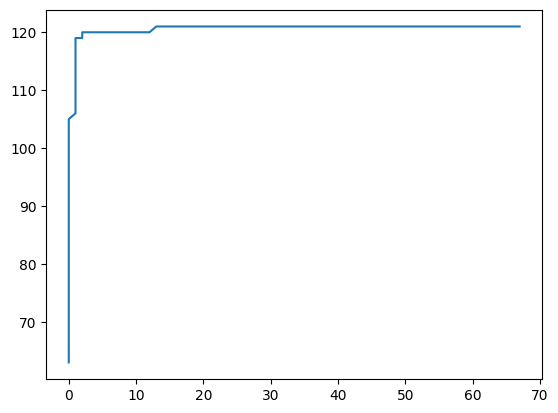

In [401]:
plt.plot(fps, tps)


# Checking performances for threshold 0.5

The predict_proba method we used to get the score returns the probability that examples belong to the positive class. Usually the positive class is then predicted as score > 0.5 (since in this case it is the one with the largest likelihood).

Let's then see where this classifier (i.e., the one obtained setting the threshold to 0.5) lays in the coverage plot and if there are better options.

**note**: since we saved interesting stats in the `performances` array, we can retrieve the fp, tp position of the classifier we get by setting the thresholds to 0.5, by finding the position of the row we are interested using the expression: `performances[:,1] == 0.5` and then using the resulting boolean vector to retrieve the correct row of the matrix: `performances[performances[:,1] == 0.5]`.
```

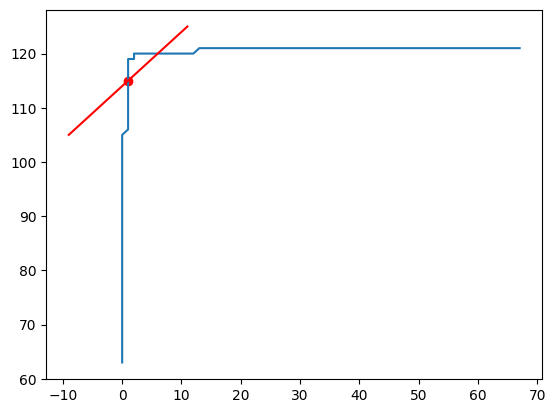

In [402]:
plt.plot(fps, tps)
accuracy, threshold, fp, tp = performances[performances[:,1] == 0.5][0]
plt.scatter(fp,tp,color='red')
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

As it is shown by the red dot and the red line, threshold 0.5 is a good one, but apparently two other points can reach a better classification.

Let us see where these point lay in the plot and what is their accuracy.

In [403]:
# Note: the subscription returns a matrix with a single row, but still two dimensions, 
# we need to get the element in the first position of that matrix...

perf05 = performances[performances[:, 1] == 0.5][0,0] 
performances[performances[:,0] > perf05]

array([[  0.96808511,   0.16      ,   5.        , 120.        ],
       [  0.96808511,   0.17      ,   5.        , 120.        ],
       [  0.97340426,   0.18      ,   4.        , 120.        ],
       [  0.97340426,   0.19      ,   4.        , 120.        ],
       [  0.97340426,   0.2       ,   4.        , 120.        ],
       [  0.97340426,   0.21      ,   4.        , 120.        ],
       [  0.98404255,   0.22      ,   2.        , 120.        ],
       [  0.9787234 ,   0.23      ,   2.        , 119.        ],
       [  0.9787234 ,   0.24      ,   2.        , 119.        ],
       [  0.98404255,   0.25      ,   1.        , 119.        ],
       [  0.98404255,   0.26      ,   1.        , 119.        ],
       [  0.98404255,   0.27      ,   1.        , 119.        ],
       [  0.98404255,   0.28      ,   1.        , 119.        ],
       [  0.98404255,   0.29      ,   1.        , 119.        ],
       [  0.98404255,   0.3       ,   1.        , 119.        ],
       [  0.98404255,   0

The two points that we are looking for are then in position (5,121) and (1,117)

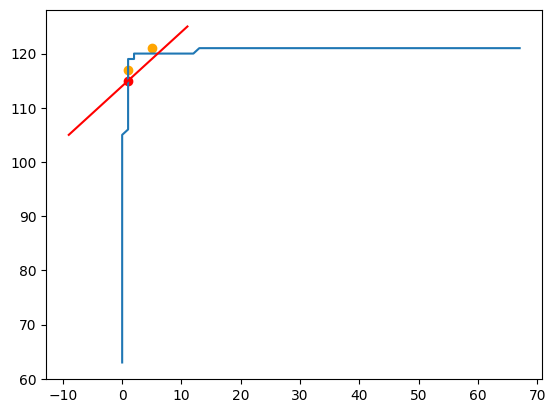

In [404]:
plt.plot(fps, tps)
fp, tp = eval_fp_tp(test_labels, scores > 0.5)
plt.scatter(fp,tp, color="red")
plt.scatter(5,121, color="orange")
plt.scatter(1,117, color="orange")
plt.plot([fp-10,fp+10],[tp-10,tp+10], color="red")

These two points (that we found by looking only to the accuracies) are indeed the two points that the plot show having a better accuracy. 